<h1 align="center"> CSE 242 Assignment 4, Spring 2025

    Your name: Mengxiao Hu   Student ID:2172399(mhu110)

## Instruction 

- Submit your assignments onto **canvas** by the due date. Upload a <code>zip</code> file containing:

    (1) The saved/latest <code>.ipynb</code> file, please **rename this file with your name included**.

    (2) Also save your file into a pdf version, if error appears, save an html version instead (easy to grade for written questions).
    
    **For assignment related questions, please reach TA or grader through Slack/Piazza/Email.**
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 

## Objective 

- **Task 1:** EM algorithm (Mathematical Derivation)
- **Task 2:** K-Means implementation (Coding)
- **Task 3:** Kernel Methods with Noisy Setting (Coding)


# Question 1. (EM algorithm, 20 pts) (the EM proof is for extra credit only)

Derive the E-step and M-step update equations of EM algorithm for estimating the Gaussian mixture model $p(X;\theta) = ∑_{k=1}^{K} \pi_k N(x; \mu_k, \sigma_k^2)$ where $\pi_k$ is the mixture weight with $\pi_k \ge 0$  and  $∑_{k=1}^{K} \pi_k = 1$, and $\mu_k$, $\sigma^2_k$ are the mean and variance of the gaussian distribution corresponding to cluster k. 

For the E-step, first prove that $z_{ik} = \color{blue}{P(z_i = k | X, \mu ,\sigma, \pi)} = \dfrac {\pi_k N(x_i; \mu_k, \sigma_k^2)}{∑_{k=1}^{K} \pi_k N(x_i; \mu_k, \sigma_k^2)}$. Then, for the M-step, show the derivation to compute the updates for $(\mu_k, \pi_k)$. Note that, you don't need to show the derivation for $\sigma_k$. For each derivation step, mention the concept applied (e.g. just 2-3 keywords, e.g. formula for expectation, independence of datapoints, (f+g)' = f' + g', etc ... ). 

**Hint:** For the M-step, you need to solve for $\mu_k^t = \underset{\mu_k}{argmax} \ E_{\color{blue}{p(Z | X, \mu^{(t-1)}, \sigma^{(t-1)}, \pi^{(t-1)})}}{[\log p(X, Z | \mu, \sigma, \pi)]}$ (and similarly for $\pi_k$) by applying the first order conditions for function optimization (take derivative and set it to zero). Note that the term $\color{blue}{p(Z|X,\mu^{(t-1)},\sigma^{(t-1)},\pi^{(t-1)})}$ is the one computed in the E-step, and uses fixed values for $\mu, \sigma, \pi$ from the previous iteration (t-1).







## E-step Derivation

By Bayes' rule:
$$z_{ik} = P(z_i = k | x_i, \mu, \sigma, \pi) = \frac{P(x_i | z_i = k, \mu, \sigma, \pi) \cdot P(z_i = k | \mu, \sigma, \pi)}{P(x_i | \mu, \sigma, \pi)}$$

Given $z_i = k$, $x_i$ comes from the $k$-th Gaussian component:
$$P(x_i | z_i = k, \mu, \sigma, \pi) = N(x_i; \mu_k, \sigma_k^2)$$

The prior probability of $z_i = k$ is the mixture weight:
$$P(z_i = k | \mu, \sigma, \pi) = \pi_k$$

For the denominator, by the law of total probability:
$$P(x_i | \mu, \sigma, \pi) = \sum_{j=1}^{K} P(x_i | z_i = j, \mu, \sigma, \pi) \cdot P(z_i = j | \mu, \sigma, \pi) = \sum_{j=1}^{K} \pi_j N(x_i; \mu_j, \sigma_j^2)$$

Substituting these into the Bayes' formula:
$$z_{ik} = \frac{\pi_k N(x_i; \mu_k, \sigma_k^2)}{\sum_{j=1}^{K} \pi_j N(x_i; \mu_j, \sigma_j^2)}$$

## M-step Derivation

The complete log-likelihood is:

$$\log p(X, Z | \mu, \sigma, \pi) = \sum_{i=1}^{N} \sum_{k=1}^{K} 1(z_i = k) \log[\pi_k N(x_i; \mu_k, \sigma_k^2)]$$

Taking the expectation with respect to $p(Z | X, \mu^{(t-1)}, \sigma^{(t-1)}, \pi^{(t-1)})$:

$$\sum_{i=1}^{N} \sum_{k=1}^{K} E[1(z_i = k)] \log[\pi_k N(x_i; \mu_k, \sigma_k^2)] = \sum_{i=1}^{N} \sum_{k=1}^{K} z_{ik}^{(t)} \log[\pi_k N(x_i; \mu_k, \sigma_k^2)] = \sum_{i=1}^{N} \sum_{k=1}^{K} z_{ik}^{(t)} \log \pi_k + \sum_{i=1}^{N} \sum_{k=1}^{K} z_{ik}^{(t)} \log N(x_i; \mu_k, \sigma_k^2)$$

### Updating $\pi_k$

Using the Lagrangian method with multiplier $\lambda$:
$$L(\pi, \lambda) = \sum_{i=1}^{N} \sum_{k=1}^{K} z_{ik}^{(t)} \log \pi_k - \lambda \left(\sum_{k=1}^{K} \pi_k - 1\right)$$

Taking the derivative on $\pi_k$ and setting to zero:
$$\frac{\partial L}{\partial \pi_k} = \sum_{i=1}^{N} \frac{z_{ik}^{(t)}}{\pi_k} - \lambda = 0$$

This is equivalent to:
$$N = \sum_{k=1}^{K} \sum_{i=1}^{N} z_{ik}^{(t)} = \lambda \sum_{k=1}^{K} \pi_k = \lambda \cdot 1 = \lambda$$

Therefore:
$$\pi_k^{(t)} = \frac{1}{N} \sum_{i=1}^{N} z_{ik}^{(t)}$$
### Updating $\mu_k$

Taking the derivative on $\mu_k$:
$$\frac{\partial}{\partial \mu_k} \sum_{i=1}^{N} z_{ik}^{(t)} \log N(x_i; \mu_k, \sigma_k^2) = 0$$

Expanding the normal distribution:
$$\log N(x_i; \mu_k, \sigma_k^2) = -\frac{1}{2}\log(2\pi) - \log(\sigma_k) - \frac{(x_i - \mu_k)^2}{2\sigma_k^2}$$

Substituting into the derivation$:
$$\sum_{i=1}^{N} z_{ik}^{(t)} \frac{(x_i - \mu_k)}{\sigma_k^2} = 0$$

Solving for $\mu_k$:
$$\sum_{i=1}^{N} z_{ik}^{(t)} x_i = \mu_k \sum_{i=1}^{N} z_{ik}^{(t)}$$

Therefore:
$$\mu_k^{(t)} = \frac{\sum_{i=1}^{N} z_{ik}^{(t)} x_i}{\sum_{i=1}^{N} z_{ik}^{(t)}}$$

# Question 2. (K-Means implementation, 20 pts)

#### **Question 2.1.** Implement K-means in Python from scratch. Complete following sub-functions `update_centroids` and `update_assignments`.



In [1]:
import numpy as np

def update_assignments(data, centroids):

  ########################
  #### YOUR CODE HERE ####

  ## you will get cluster# 
  ##assignments here #####
  ########################

  n_samples = data.shape[0]
  k = centroids.shape[0]
    
  distances = np.zeros((n_samples, k))
    
  for i in range(k):
    distances[:, i] = np.sum((data - centroids[i])**2, axis=1)
    
  assignments = np.argmin(distances, axis=1)
    
  return assignments

def update_centroids(data,centroids,assignments):

  ########################
  #### YOUR CODE HERE ####
  ########################

  k = centroids.shape[0]
    
  for i in range(k):
    mask = (assignments == i)
    if np.any(mask):
      centroids[i] = np.mean(data[mask], axis=0)
    
  return centroids


def kmeans(data, centroids, max_iterations = 100):    

    for j in range(max_iterations):
        # update cluter assignments
        assignments = update_assignments(data,centroids)    # WRITE CODE FOR update_assignments
        
        # update centroid locations
        centroids = update_centroids(data,centroids,assignments)  # WRITE CODE FOR update_centroids
        
    # final assignment update
    assignments = update_assignments(data,centroids)
    return centroids, assignments

#### **Question 2.2.** Run your code on following toy dataset for different k-values, where k = {2, 3, 4, 6, 10} and plot the cluster assignments for different k's as shown in following diagram.

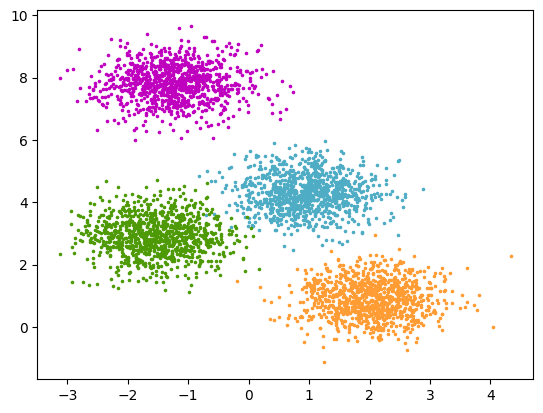

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)

colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)


/tmp/ipykernel_3721/2832435978.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10', k)


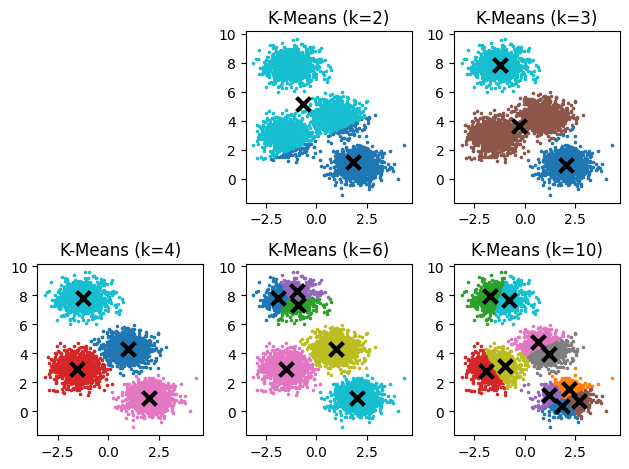

In [3]:

import numpy as np

# function to get initial cluster centroids; we randomly choose k points from the dataset 
def get_initial_clusters(k, X):
  random_indices = np.random.randint(0, X.shape[0], k)
  initial_centroids = X[random_indices]

  return initial_centroids

k_values = [2, 3, 4, 6, 10]

for i, k in enumerate(k_values):
  
  centroids = get_initial_clusters(k, X)
  centroids, assignments = kmeans(X, centroids)
    
  plt.subplot(2, 3, i+2)
  plt.title(f'K-Means (k={k})')
    
  from matplotlib.cm import get_cmap
  cmap = get_cmap('tab10', k)
    
  for j in range(k):
    cluster_points = X[assignments == j]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=cmap(j), marker=".", s=10)
    
  plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, linewidths=3, color="k")

plt.tight_layout()
plt.show()
  


# Question 3. (Kernel Methods with Noisy Setting, 60 pts)

**SVM on synthetic dataset generated as follows:**

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_+ = (1,1)$ and $\Sigma_+ = [1, 0; 0, 1]$ and label them as $+1$.

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_- = (-1,-1)$ and $\Sigma_- = [3, 0; 0, 3]$ and label them as $-1$.
    
- This gives you a $2000$ example training set. Repeat the above to draw a test set the same way.

Use a SVM package ( scikit-learn svm.SVC class) to learn SVMs with a variety of parameter settings. 

In [4]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


X_train1 = np.random.multivariate_normal([1, 1], [[1, 0], [0, 1]], 1000)
X_train2 = np.random.multivariate_normal([-1, -1], [[3, 0], [0, 3]], 1000)

X_test1 = np.random.multivariate_normal([1, 1], [[1, 0], [0, 1]], 1000)
X_test2 = np.random.multivariate_normal([-1, -1], [[3, 0], [0, 3]], 1000)

Y_train1 = np.ones(1000)
Y_train2 = -1*np.ones(1000)

Y_test1 = np.ones(1000)
Y_test2 = -1*np.ones(1000)

X = np.concatenate((X_train1, X_train2), axis=0)
y = np.concatenate((Y_train1, Y_train2), axis=0)

X_train, y_train = shuffle(X, y, random_state=0)

X_test = np.concatenate((X_test1, X_test2), axis=0)
Y_test = np.concatenate((Y_test1, Y_test2), axis=0)

## (a -- 20 pts) 

- Use an RBF kernel with parameters $C=1$, $\gamma = 0.01$. 

- For each training data with +1 label, randomly flip their label to -1 with probability $\textbf{0.35}$.

- For each training data with -1 label, randomly flip their label to +1 with probability $\textbf{0.20}$.

- Train with the above noisy training examples.

- Random flipping introduces the randomness. You can repeat multiple times (e.g. 20) and then report the average accuracy on the testing dataset (clean) in the noise parameter setting. 



In [5]:
# Your code here
def add_label_noise(y, flip_pos_prob=0.35, flip_neg_prob=0.20):
    y_noisy = y.copy()
    
    pos_indices = np.where(y == 1)[0]
    neg_indices = np.where(y == -1)[0]
    
    flip_pos = np.random.random(len(pos_indices)) < flip_pos_prob
    y_noisy[pos_indices[flip_pos]] = -1
    
    flip_neg = np.random.random(len(neg_indices)) < flip_neg_prob
    y_noisy[neg_indices[flip_neg]] = 1
    
    return y_noisy

n_repetitions = 20
accuracies = []

for i in range(n_repetitions):
    y_train_noisy = add_label_noise(y_train)
    
    svm_model = SVC(kernel='rbf', C=1.0, gamma=0.01)
    svm_model.fit(X_train, y_train_noisy)
    
    y_pred = svm_model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"Repetition {i+1}: Test accuracy = {accuracy:.4f}")

avg_accuracy = np.mean(accuracies)

print(f"\nResults for Task 1:")
print(f"SVM with RBF kernel (C=1, gamma=0.01) on noisy data")
print(f"Average test accuracy over {n_repetitions} repetitions: {avg_accuracy:.4f}")

Repetition 1: Test accuracy = 0.8130
Repetition 2: Test accuracy = 0.8210
Repetition 3: Test accuracy = 0.8475
Repetition 4: Test accuracy = 0.7540
Repetition 5: Test accuracy = 0.8310
Repetition 6: Test accuracy = 0.8320
Repetition 7: Test accuracy = 0.8155
Repetition 8: Test accuracy = 0.8230
Repetition 9: Test accuracy = 0.8150
Repetition 10: Test accuracy = 0.8080
Repetition 11: Test accuracy = 0.8160
Repetition 12: Test accuracy = 0.8030
Repetition 13: Test accuracy = 0.7985
Repetition 14: Test accuracy = 0.8170
Repetition 15: Test accuracy = 0.8310
Repetition 16: Test accuracy = 0.8340
Repetition 17: Test accuracy = 0.8335
Repetition 18: Test accuracy = 0.7975
Repetition 19: Test accuracy = 0.8110
Repetition 20: Test accuracy = 0.8055

Results for Task 1:
SVM with RBF kernel (C=1, gamma=0.01) on noisy data
Average test accuracy over 20 repetitions: 0.8153


## (b -- 20 pts) Open question

- Try using **K-Nearst Neighbors** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement?


In [6]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier

def correct_labels_with_knn(X, y_noisy, k=5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y_noisy)
    y_corrected = knn.predict(X)
    return y_corrected

n_repetitions = 20
    
accuracies_baseline = []  # SVM with noisy labels (no correction)
accuracies_corrected = []  # SVM with KNN-corrected labels
    
for i in range(n_repetitions):
    y_train_noisy = add_label_noise(y_train)
        
    svm_baseline = SVC(kernel='rbf', C=1.0, gamma=0.01)
    svm_baseline.fit(X_train, y_train_noisy)
    y_pred_baseline = svm_baseline.predict(X_test)
    accuracy_baseline = accuracy_score(Y_test, y_pred_baseline)
    accuracies_baseline.append(accuracy_baseline)
        
    y_train_corrected = correct_labels_with_knn(X_train, y_train_noisy)
        
    svm_corrected = SVC(kernel='rbf', C=1.0, gamma=0.01)
    svm_corrected.fit(X_train, y_train_corrected)
    y_pred_corrected = svm_corrected.predict(X_test)
    accuracy_corrected = accuracy_score(Y_test, y_pred_corrected)
    accuracies_corrected.append(accuracy_corrected)
        
    print(f"Repetition {i+1}: Baseline Accuracy = {accuracy_baseline:.4f}, Corrected Accuracy = {accuracy_corrected:.4f}")

avg_accuracy_baseline = np.mean(accuracies_baseline)
avg_accuracy_corrected = np.mean(accuracies_corrected)
     
print(f"Baseline (noisy labels): {avg_accuracy_baseline:.4f}")
print(f"KNN-corrected labels: {avg_accuracy_corrected:.4f}")


Repetition 1: Baseline Accuracy = 0.7950, Corrected Accuracy = 0.8220
Repetition 2: Baseline Accuracy = 0.8345, Corrected Accuracy = 0.8625
Repetition 3: Baseline Accuracy = 0.8140, Corrected Accuracy = 0.8505
Repetition 4: Baseline Accuracy = 0.8110, Corrected Accuracy = 0.8405
Repetition 5: Baseline Accuracy = 0.8380, Corrected Accuracy = 0.8635
Repetition 6: Baseline Accuracy = 0.8120, Corrected Accuracy = 0.8410
Repetition 7: Baseline Accuracy = 0.7945, Corrected Accuracy = 0.8340
Repetition 8: Baseline Accuracy = 0.8130, Corrected Accuracy = 0.8670
Repetition 9: Baseline Accuracy = 0.8015, Corrected Accuracy = 0.8220
Repetition 10: Baseline Accuracy = 0.8330, Corrected Accuracy = 0.8670
Repetition 11: Baseline Accuracy = 0.8105, Corrected Accuracy = 0.8575
Repetition 12: Baseline Accuracy = 0.8325, Corrected Accuracy = 0.8685
Repetition 13: Baseline Accuracy = 0.8020, Corrected Accuracy = 0.8560
Repetition 14: Baseline Accuracy = 0.8425, Corrected Accuracy = 0.8670
Repetition 15: 

## (c -- 20 pts) Open question

- Try using **clustering (i.e., K-means, EM-clustering)** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement?

In [7]:
# Your code here
from sklearn.cluster import KMeans

def correct_labels_with_kmeans(X, y_noisy, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    # Map cluster labels to original class labels
    clusters = np.unique(cluster_labels)
    mapping = {}
    
    for cluster in clusters:
        indices = np.where(cluster_labels == cluster)[0]
        
        labels_in_cluster = y_noisy[indices]
        unique_labels, counts = np.unique(labels_in_cluster, return_counts=True)
        
        if len(unique_labels) == 0:
            mapping[cluster] = 1 
        else:
            majority_idx = np.argmax(counts)
            mapping[cluster] = unique_labels[majority_idx]
    
    y_corrected = np.array([mapping[cluster] for cluster in cluster_labels])
    return y_corrected
    
n_repetitions = 20
    
accuracies_baseline = []  # SVM with noisy labels (no correction)
accuracies_corrected = []  # SVM with K-means labels

all_corrected_labels = []
    
for i in range(n_repetitions):
    y_train_noisy = add_label_noise(y_train)
        
    svm_baseline = SVC(kernel='rbf', C=1.0, gamma=0.01)
    svm_baseline.fit(X_train, y_train_noisy)
    y_pred_baseline = svm_baseline.predict(X_test)
    accuracy_baseline = accuracy_score(Y_test, y_pred_baseline)
    accuracies_baseline.append(accuracy_baseline)
        
    y_train_corrected = correct_labels_with_kmeans(X_train, y_train_noisy)
        
    svm_corrected = SVC(kernel='rbf', C=1.0, gamma=0.01)
    svm_corrected.fit(X_train, y_train_corrected)
    y_pred_corrected = svm_corrected.predict(X_test)
    accuracy_corrected = accuracy_score(Y_test, y_pred_corrected)
    accuracies_corrected.append(accuracy_corrected)
        
    print(f"Repetition {i+1}: Baseline Accuracy = {accuracy_baseline:.4f}, Corrected Accuracy = {accuracy_corrected:.4f}")

avg_accuracy_baseline = np.mean(accuracies_baseline)
avg_accuracy_corrected = np.mean(accuracies_corrected)
     
print(f"Baseline (noisy labels): {avg_accuracy_baseline:.4f}")
print(f"K-means-corrected labels: {avg_accuracy_corrected:.4f}")

Repetition 1: Baseline Accuracy = 0.7745, Corrected Accuracy = 0.8440
Repetition 2: Baseline Accuracy = 0.8320, Corrected Accuracy = 0.8440
Repetition 3: Baseline Accuracy = 0.8440, Corrected Accuracy = 0.8440
Repetition 4: Baseline Accuracy = 0.7960, Corrected Accuracy = 0.8440
Repetition 5: Baseline Accuracy = 0.8375, Corrected Accuracy = 0.8440
Repetition 6: Baseline Accuracy = 0.7835, Corrected Accuracy = 0.8440
Repetition 7: Baseline Accuracy = 0.8115, Corrected Accuracy = 0.8440
Repetition 8: Baseline Accuracy = 0.8335, Corrected Accuracy = 0.8440
Repetition 9: Baseline Accuracy = 0.7995, Corrected Accuracy = 0.8440
Repetition 10: Baseline Accuracy = 0.8365, Corrected Accuracy = 0.8440
Repetition 11: Baseline Accuracy = 0.8075, Corrected Accuracy = 0.8440
Repetition 12: Baseline Accuracy = 0.8070, Corrected Accuracy = 0.8440
Repetition 13: Baseline Accuracy = 0.7850, Corrected Accuracy = 0.8440
Repetition 14: Baseline Accuracy = 0.8030, Corrected Accuracy = 0.8440
Repetition 15: 